In [1]:
from Modelling.Baselines.build_samples import import_samples_for_baseline
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load model
model = keras.models.load_model('baseline1.h5')

In [3]:
# import data
X_train, y_train, X_test, y_test = import_samples_for_baseline(label_mapping='Ohne_Auto_See')

In [4]:
# prediction
y_pred_train = model.predict(X_train)

33000/33000 [==============================] - 63s 2ms/step


In [5]:
# choose argmax
y_pred_train = y_pred_train.argmax(axis=1)
y_train = np.array(y_train).argmax(axis=1)

**Accuracy**

In [6]:
print(accuracy_score(y_true=y_train, y_pred=y_pred_train))

0.8223835227272728


**Confusions-Matrix**

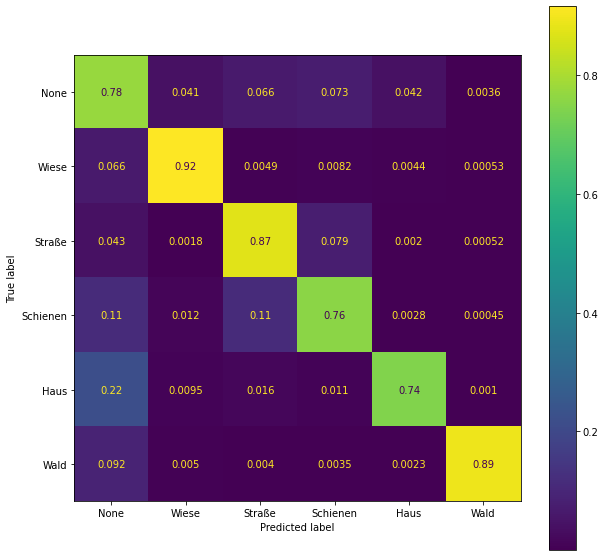

In [20]:
cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train, labels=[0, 1, 2, 3, 4, 5], normalize='true')
cmp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['None', 'Wiese','Straße','Schienen','Haus','Wald'])
fig, ax = plt.subplots(figsize=(10, 10))
cmp.plot(ax=ax)
plt.show()

In [21]:
from Code.image_functions import *
from Code.find_path_nextcloud import find_path_nextcloud

In [22]:
path_nextcloud = find_path_nextcloud()
path_labeled_folder = path_nextcloud + "Daten_Gyrocopter/Oldenburg/Teilbilder/grid_200_200/labeled/"
df_annotations = import_labeled_data(path_labeled_folder)

In [23]:
import tensorflow

In [24]:
X = df_annotations.drop(columns=['label', 'picture_name'])
X = tensorflow.convert_to_tensor(X, dtype=tensorflow.float32)

In [25]:
# prediction
y_pred = model.predict(X)
# choose argmax
df_annotations['y_pred'] = y_pred.argmax(axis=1)

41250/41250 [==============================] - 94s 2ms/step


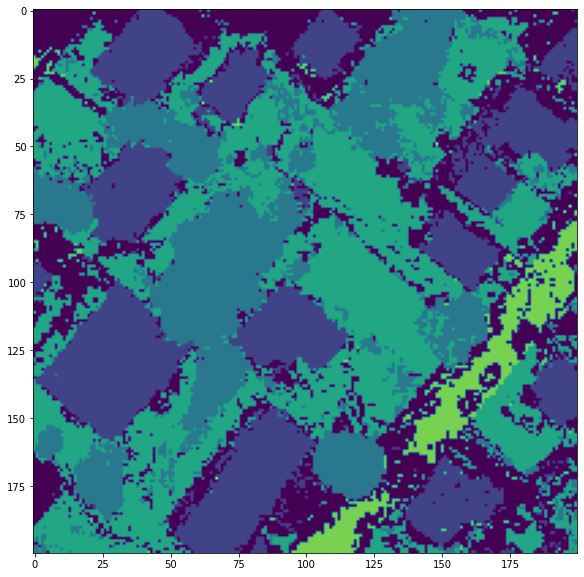

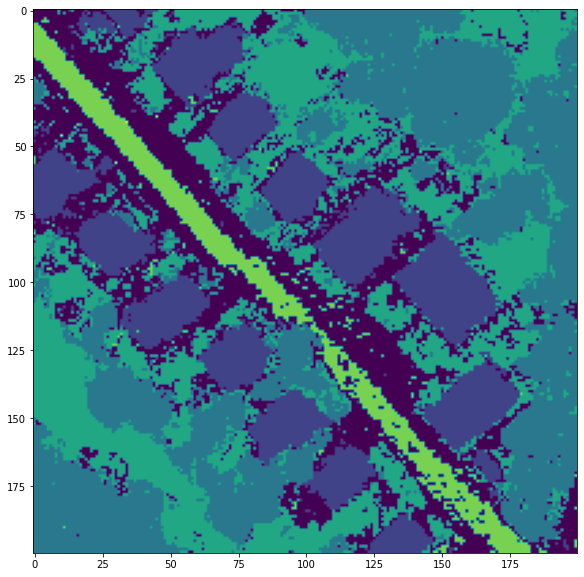

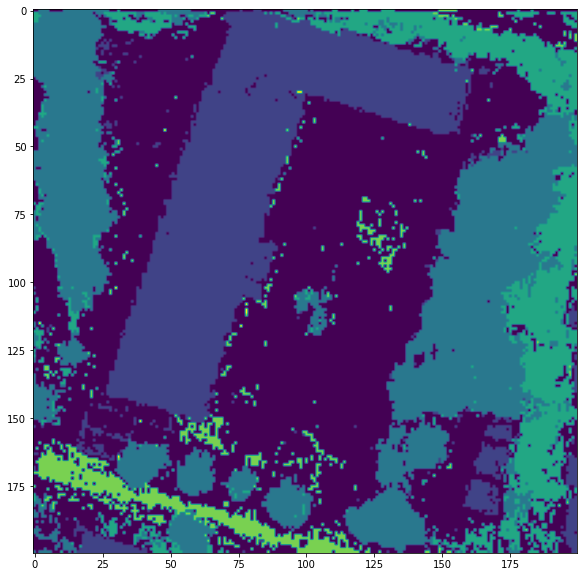

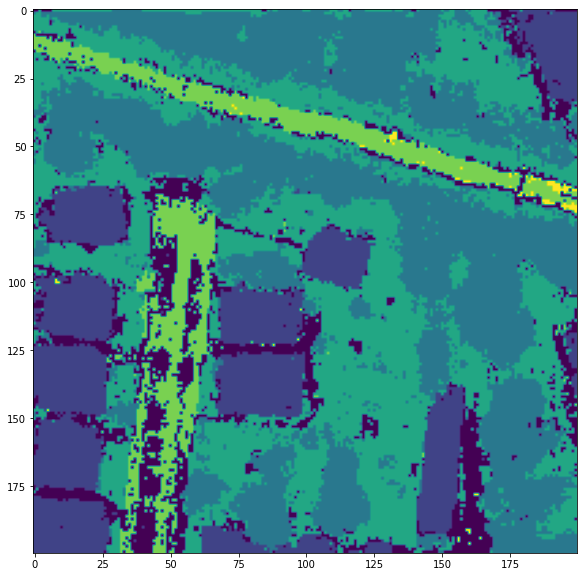

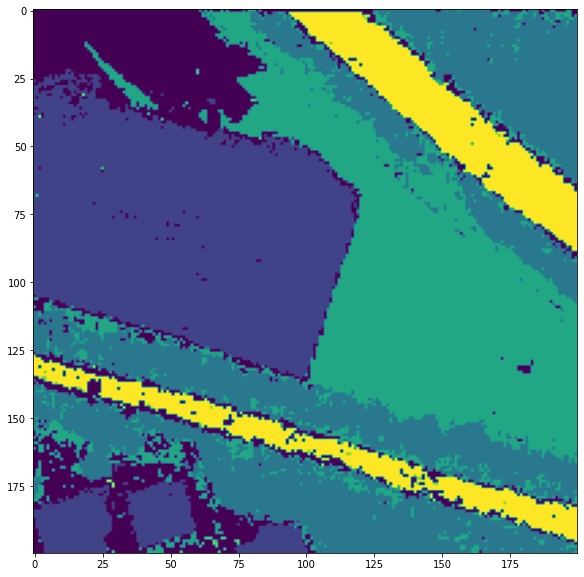

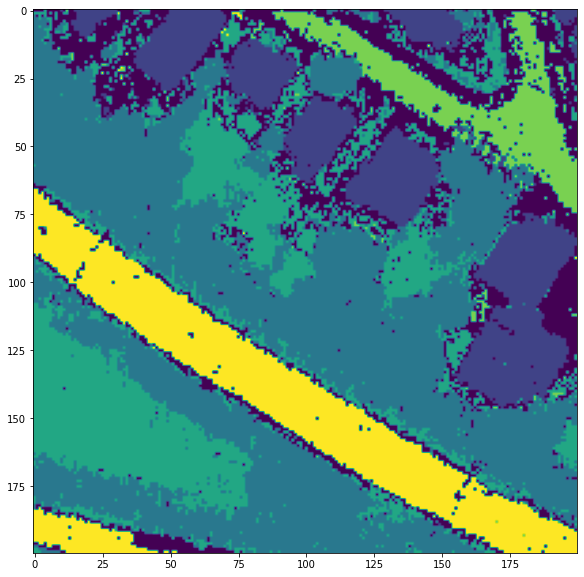

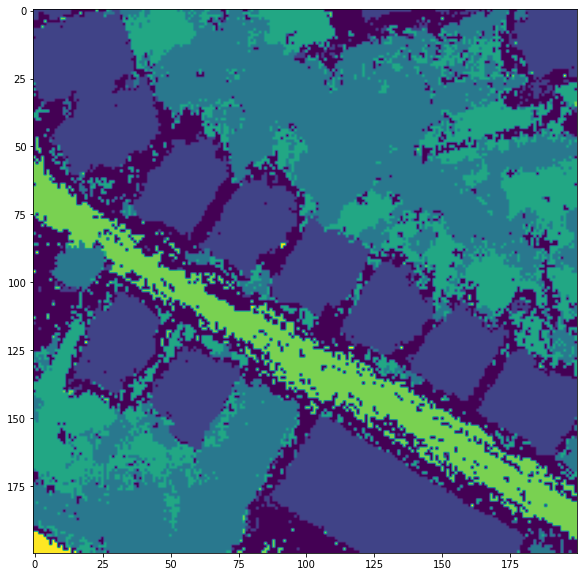

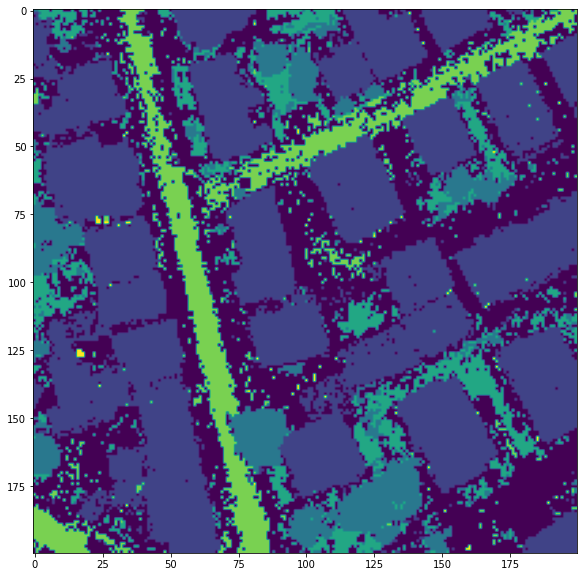

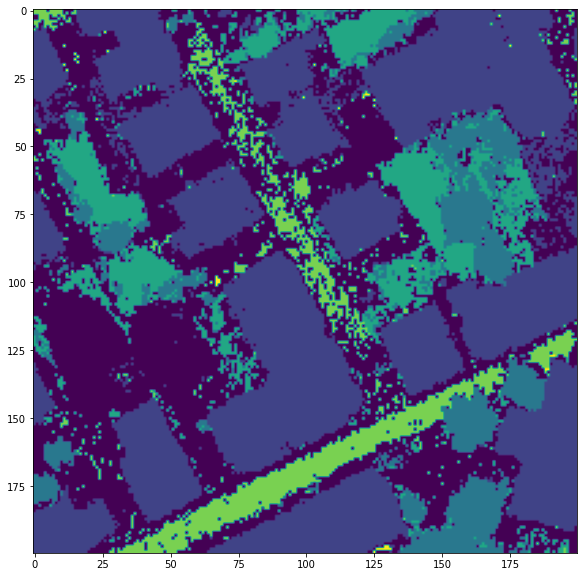

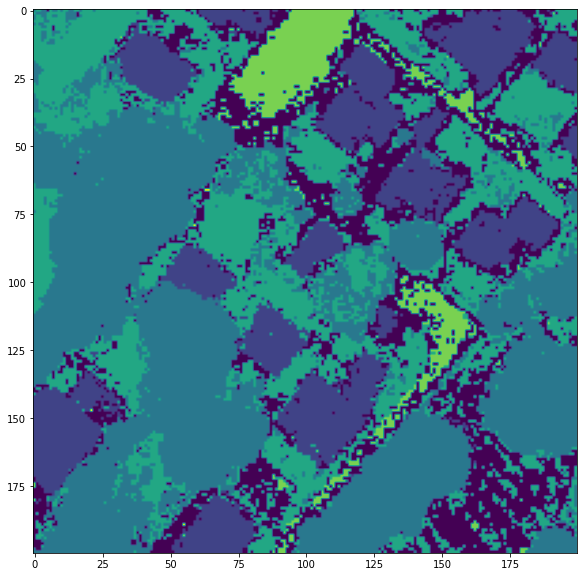

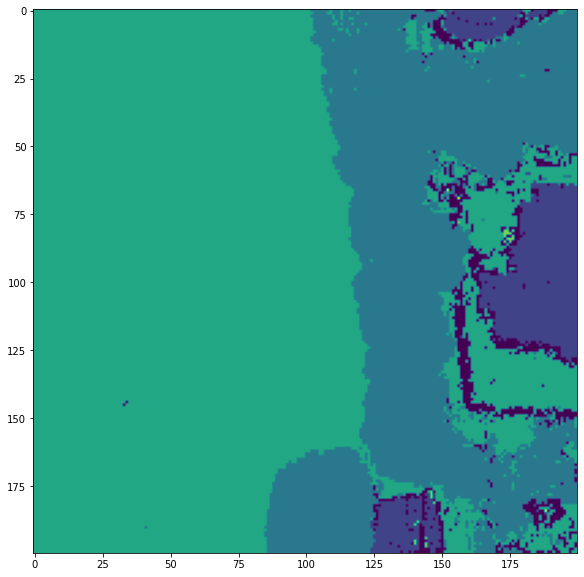

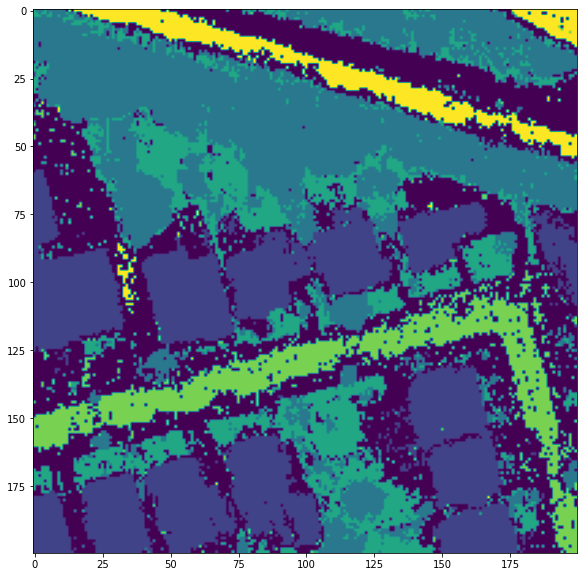

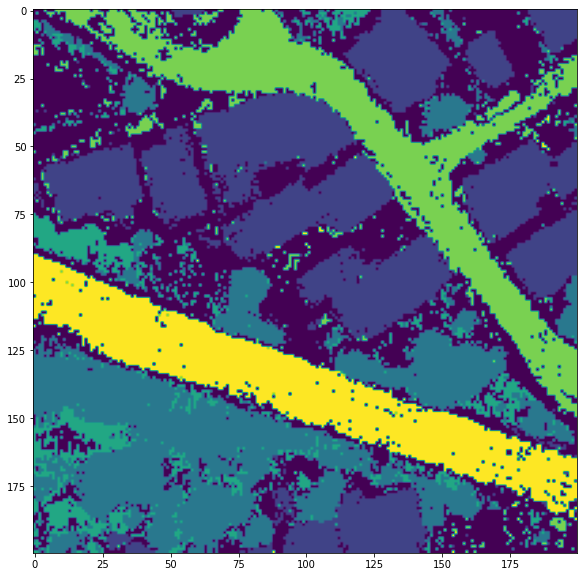

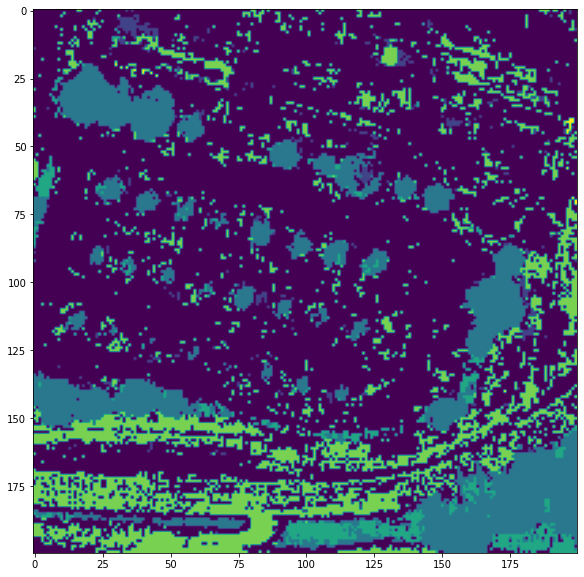

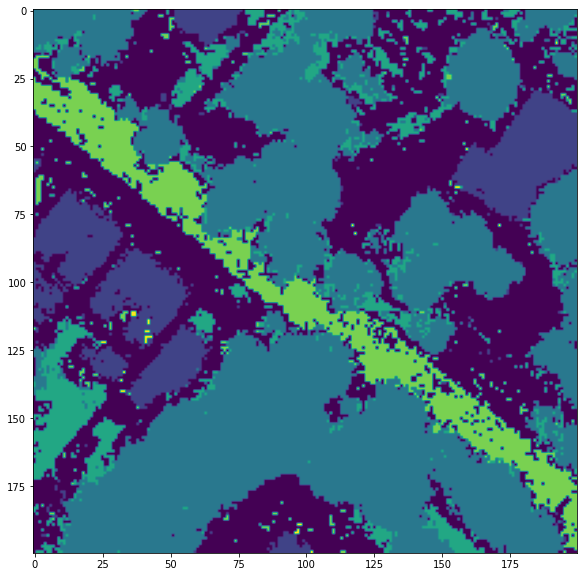

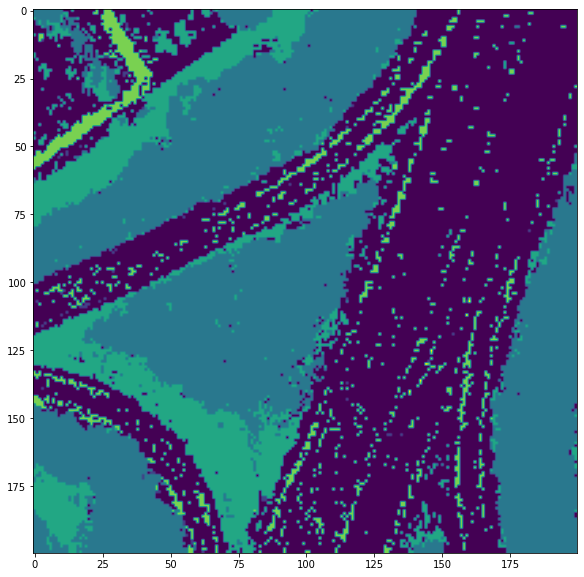

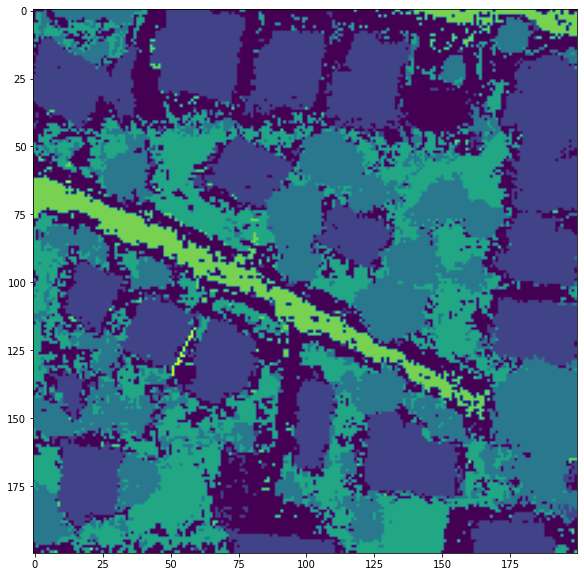

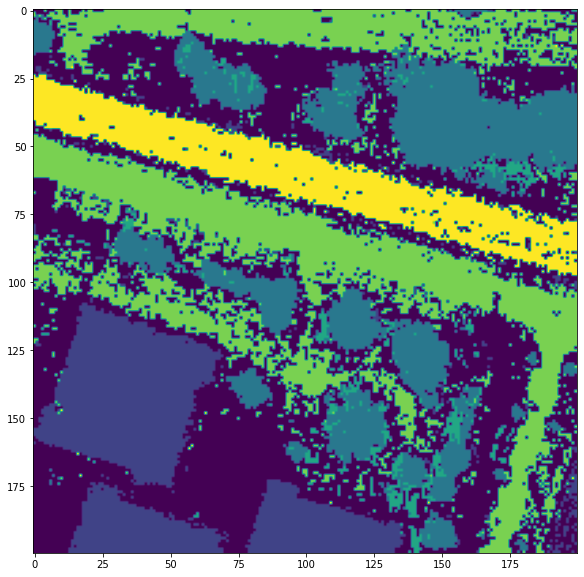

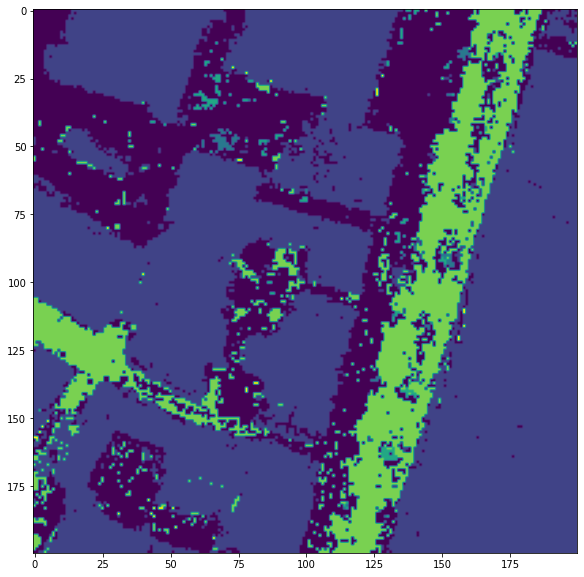

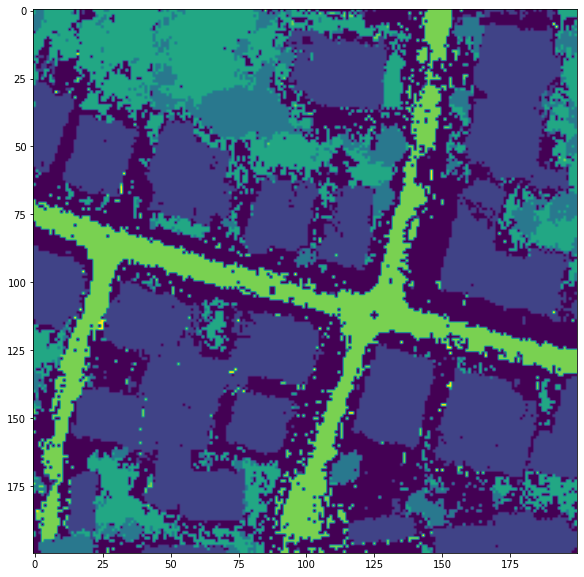

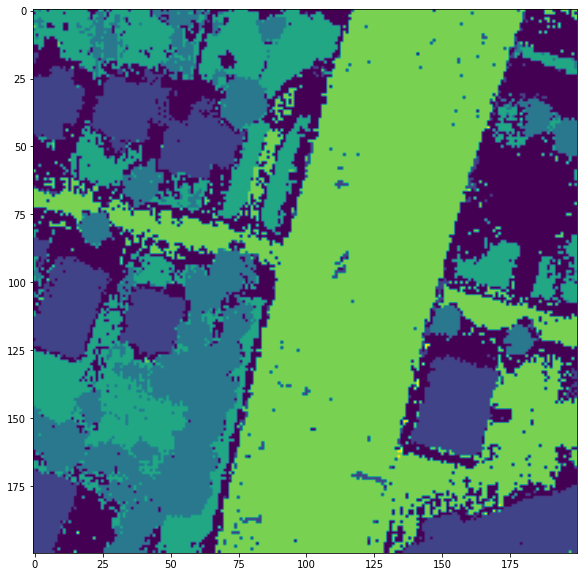

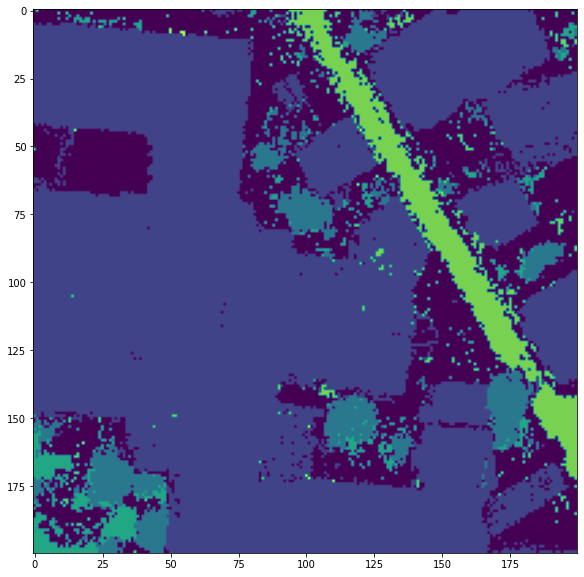

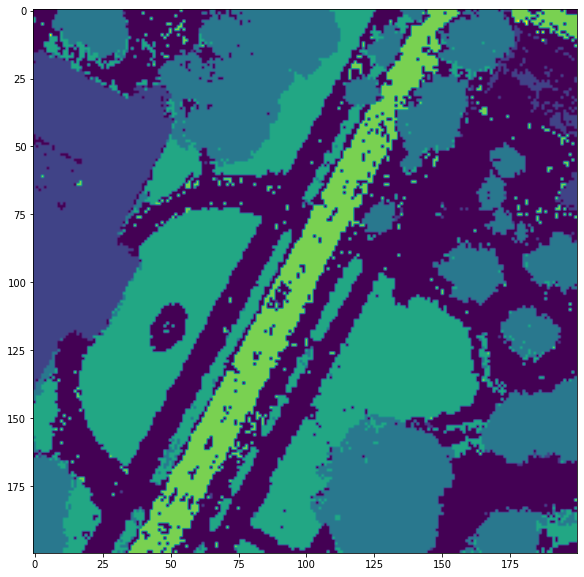

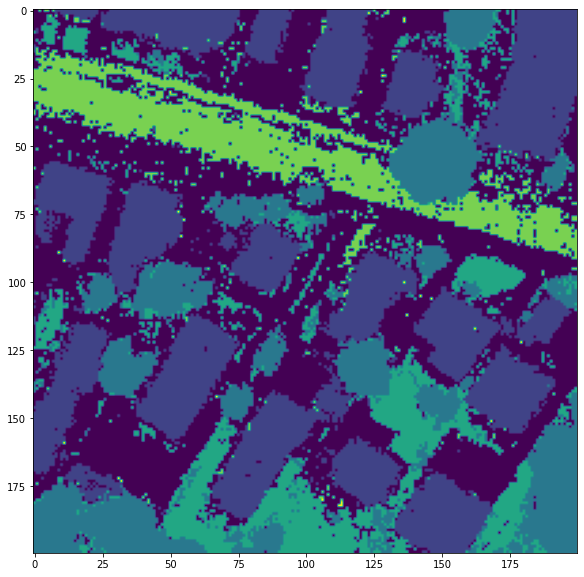

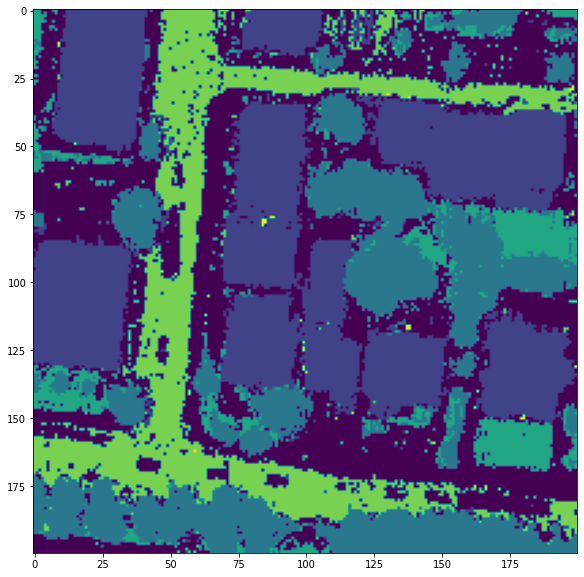

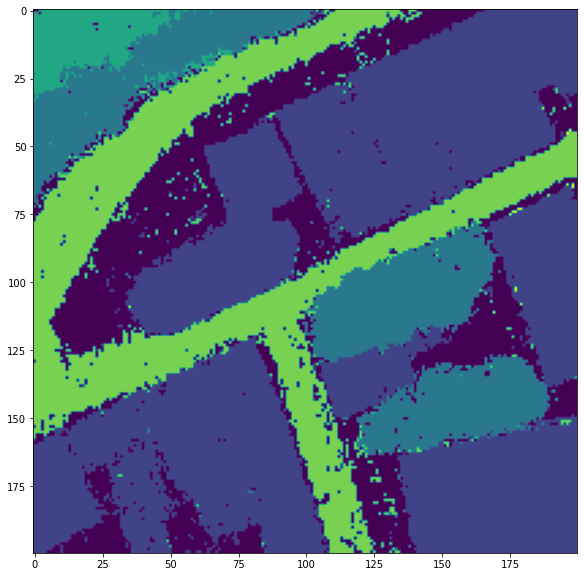

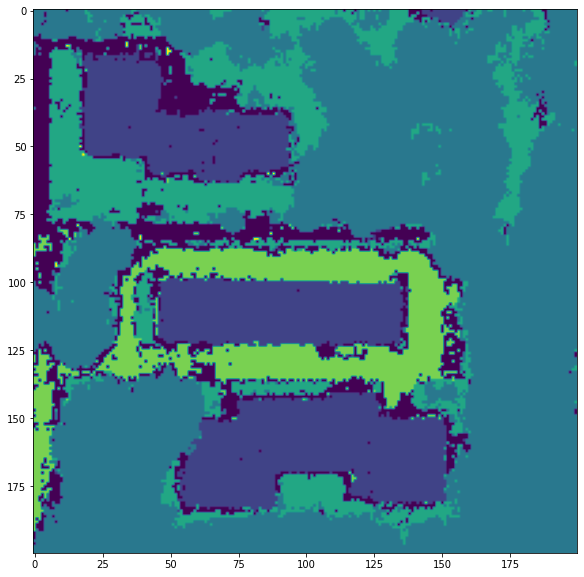

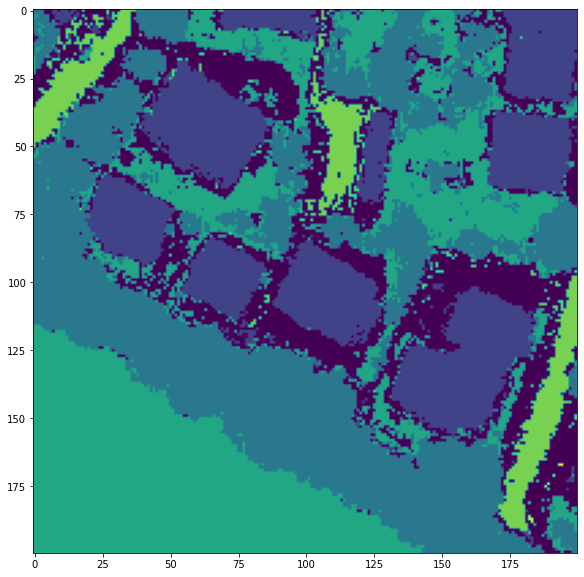

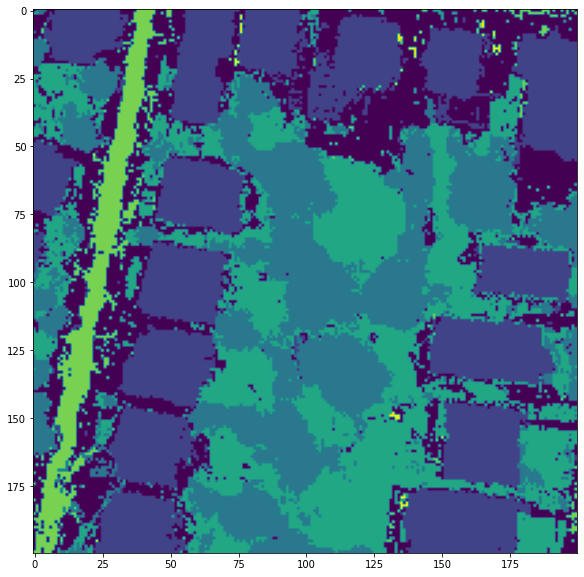

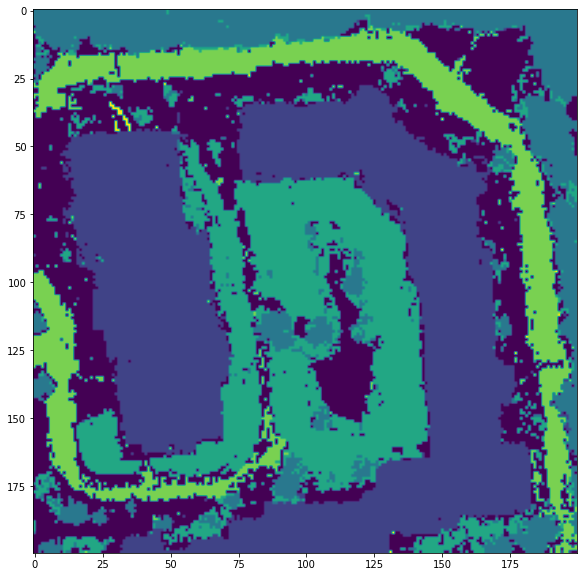

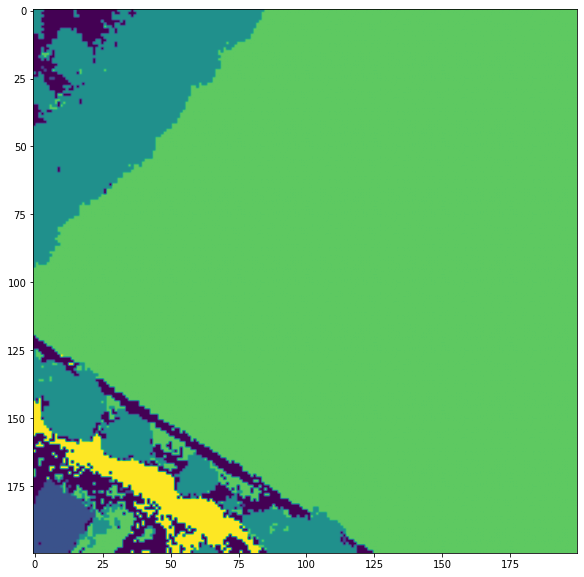

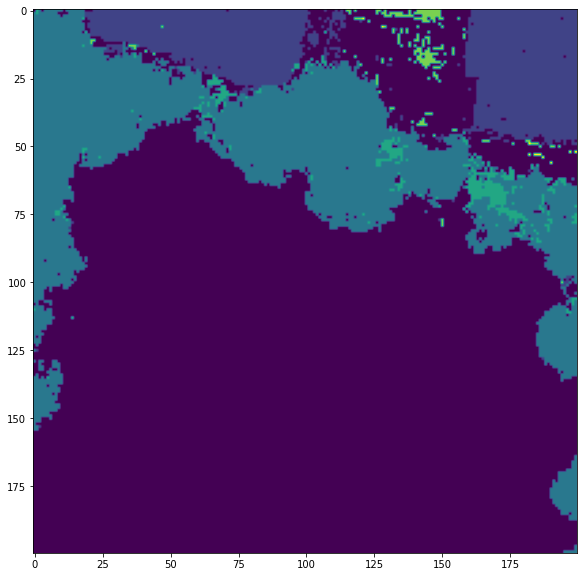

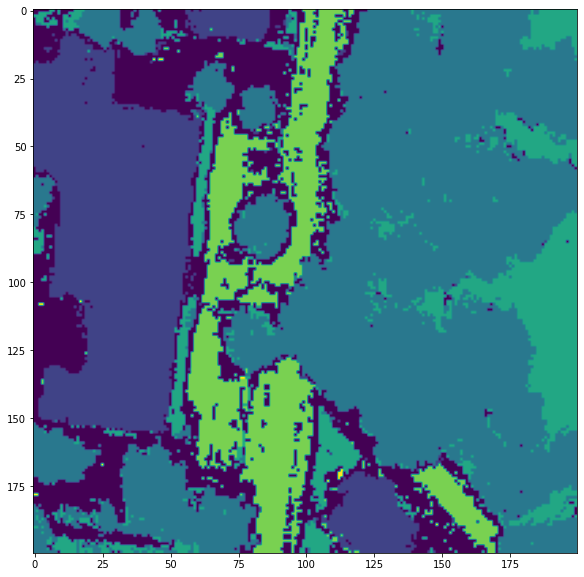

In [27]:
for image_name in df_annotations['picture_name'].unique():
    image = df_annotations.loc[df_annotations['picture_name'] == image_name, ]
    image = image.drop(columns=['picture_name'])
    img_arr = np.array(image, dtype=float)
    img_arr = np.reshape(img_arr, (200, 200, 111))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img_arr[:, :, -1])
    plt.show()
    fig.savefig(image_name)

### Vorhersage Gesamtbild

In [29]:
# find project path in nextcloud
path_nextcloud = find_path_nextcloud()

# define path with data
path_folder = path_nextcloud + 'Daten_Gyrocopter/Oldenburg'

# define HSI filenames
path_combined_hdr = path_folder + '/Oldenburg_combined_HSI_THERMAL_DOM.hdr'
path_combined_dat = path_folder + '/Oldenburg_combined_HSI_THERMAL_DOM.dat'

# read image
img = envi.open(file=path_combined_hdr, image=path_combined_dat)

arr = img.load()

In [30]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

# convert only wavelength into dataframe and round numbers
value_bands = ['hsi_band_' + str(int(float(x))) + '_nm' for x in img.metadata['wavelength'] if isfloat(x)]
value_bands.extend(['thermal', 'dom'])

X = pd.DataFrame(arr.reshape(((arr.shape[0]*arr.shape[1]), arr.shape[2])), columns=value_bands)

In [34]:
X_1 = X.iloc[:X.shape[0]//2]

In [35]:
X_1 = tensorflow.convert_to_tensor(X_1, dtype=tensorflow.float32)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
# prediction
y_pred = model.predict(X)
# choose argmax
df_annotations['y_pred'] = y_pred.argmax(axis=1)

In [ ]:
for image_name in df_annotations['picture_name'].unique():
    image = df_annotations.loc[df_annotations['picture_name'] == image_name,]
    image = image.drop(columns=['picture_name'])
    img_arr = np.array(image, dtype=float)
    img_arr = np.reshape(img_arr, (200, 200, 111))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img_arr[:, :, -1])
    plt.show()
    fig.savefig(image_name)